In [ ]:
# dataset link https://drive.google.com/file/d/1lg3ELpSs162URKNF4lYSmA_W7Lifxtd0/view?usp=share_link
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
import time
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("imdb_reviews.csv")
# df = pd.read_csv("test_reviews.csv")

In [3]:
data.head(10)

,Reviews,Sentiment
0,<START this film was just brilliant casting lo...,positive
1,<START big hair big boobs bad music and a gian...,negative
2,<START this has to be one of the worst films o...,negative
3,<START the <UNK> <UNK> at storytelling the tra...,positive
4,<START worst mistake of my life br br i picked...,negative
5,<START begins better than it ends funny that t...,negative
6,<START lavish production values and solid perf...,positive
7,<START the <UNK> tells the story of the four h...,negative
8,<START just got out and cannot believe what a ...,positive
9,<START this movie has many problem associated ...,negative


In [4]:
data['value'] = np.where(data['Sentiment']== 'positive', 1, 0)
data

,Reviews,Sentiment,value
0,<START this film was just brilliant casting lo...,positive,1
1,<START big hair big boobs bad music and a gian...,negative,0
2,<START this has to be one of the worst films o...,negative,0
3,<START the <UNK> <UNK> at storytelling the tra...,positive,1
4,<START worst mistake of my life br br i picked...,negative,0
...,...,...,...
24995,<START this is a racist movie but worthy of st...,positive,1
24996,<START bela lugosi plays a doctor who will do ...,negative,0
24997,<START in a far away galaxy is a planet called...,negative,0
24998,<START six degrees had me hooked i looked forw...,positive,1


In [5]:
data.shape

(25000, 3)

In [6]:
data['Sentiment'].value_counts()

Sentiment
positive    12500
negative    12500
Name: count, dtype: int64

In [7]:
data.isnull().sum()

Reviews      0
Sentiment    0
value        0
dtype: int64

In [8]:

x = data['Reviews']

y = data['value']


In [9]:
y

0        1
1        0
2        0
3        1
4        0
        ..
24995    1
24996    0
24997    0
24998    1
24999    0
Name: value, Length: 25000, dtype: int32

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 40, test_size = 0.2)

In [13]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mickey\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mickey\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [14]:
# token = nltk.word_tokenize(df)

In [15]:
stop = set(stopwords.words("english"))

import re
def striphtml(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

def remove_stopwords(text):
    filtered_words = " ".join([word.lower() for word in text.split() if word.lower() not in stop])
    filtered_words = striphtml(filtered_words)
    return filtered_words



In [16]:
x_train = x_train.apply(remove_stopwords)
x_test = x_test.apply(remove_stopwords)


In [17]:
# x.head()

# TF-IDF vectorization Machine learning

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()

In [25]:
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
model

LogisticRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import f1_score

In [29]:
f1_score(y_pred, y_test)

0.8754462514875049

#  TextVectorization using tensorflow

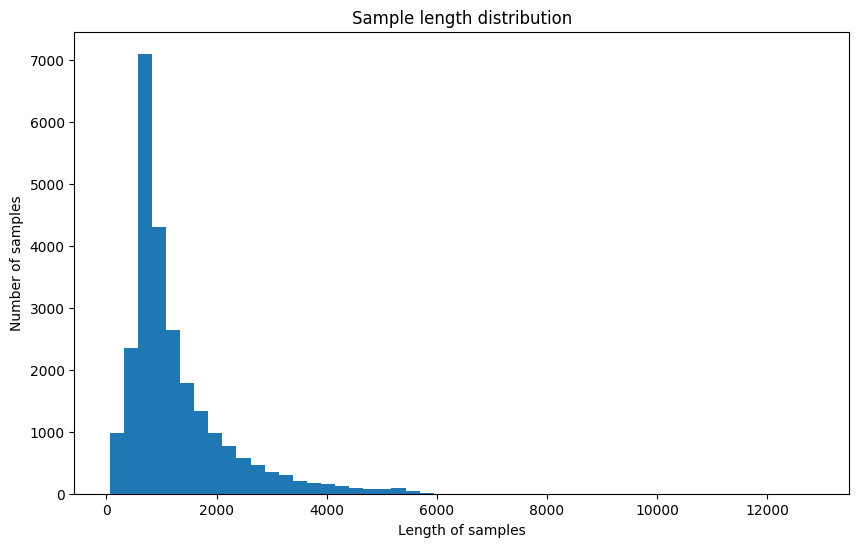

In [30]:
# Now, let's see the average number of words per sample
plt.figure(figsize=(10, 6))
plt.hist([len(sample) for sample in list(data['Reviews'])], 50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

In [31]:
VOCAB_SIZE = 2000 
output_vector_len = 120

vectorize_layer = tf.keras.layers.TextVectorization(
 max_tokens=VOCAB_SIZE,
 output_mode='int',
 output_sequence_length=output_vector_len
 )

# train vector
vectorize_layer.adapt(x_train)

In [32]:
X_train = vectorize_layer(x_train)
X_test = vectorize_layer(x_test)

In [33]:
X_train[0]

<tf.Tensor: shape=(120,), dtype=int64, numpy=
array([  26,   18, 1406,  733, 1020,  576,  325,  923,   49,  918,  116,
       1848,    1,  204,    1,  504,  352, 1293,    1, 1523,  364,  653,
        677,  923,  111,  137,    1,   88,  144,  504,   85, 1101, 1084,
          1,    1,   35,  141,    1,  883,    1,  128,    1,  160,  162,
        375,  116,  100,    1,  482,  481,    1,   36,   24,    1,    3,
         42,    9,   19, 1665,    2,    2,  824,  946,    1, 1533,   96,
       1722,  123,  228,   34,    1,  181, 1203,   25,   86,   12,   48,
       1263,  116,    1,    1,  956,  134,    1, 1991,  380,  124,    1,
        210,  393,   67,  181,  504, 1212,  344,    1,    1,    1,  719,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int64)>

In [34]:
y_train[0]

1

In [35]:
# apply sentiment analysis using deep learning models

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(2000, 8, input_length=120),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 8)            16000     
                                                                 
 bidirectional (Bidirectiona  (None, 200)              87200     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               25728     
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 133,089
Trainable params: 133,089
Non-trainable params: 0
__________________________________________________

In [38]:
num_epochs = 5
history = model.fit(X_train, y_train, 
                    epochs=num_epochs, 
                    validation_split = 0.2)

Epoch 1/5
500/500 [==============================] - 68s 128ms/step - loss: 0.5208 - accuracy: 0.7253 - val_loss: 0.4051 - val_accuracy: 0.8205
Epoch 2/5
500/500 [==============================] - 70s 139ms/step - loss: 0.3593 - accuracy: 0.8468 - val_loss: 0.3854 - val_accuracy: 0.8253
Epoch 3/5
500/500 [==============================] - 76s 151ms/step - loss: 0.3219 - accuracy: 0.8661 - val_loss: 0.4098 - val_accuracy: 0.8265
Epoch 4/5
500/500 [==============================] - 80s 161ms/step - loss: 0.3157 - accuracy: 0.8711 - val_loss: 0.4155 - val_accuracy: 0.8140
Epoch 5/5
500/500 [==============================] - 91s 182ms/step - loss: 0.2912 - accuracy: 0.8845 - val_loss: 0.4067 - val_accuracy: 0.8263


In [39]:
check = model.evaluate(X_test, y_test)

157/157 [==============================] - 9s 48ms/step - loss: 0.3958 - accuracy: 0.8334


In [40]:
print("Loss = ", check[0])
print("Accurace = ", check[1])

Loss =  0.39579203724861145
Accurace =  0.8334000110626221


In [41]:
model.save("Sentiment_analysis.h5")

In [42]:
vec = vectorize_layer(["The title doesn't appear on screen until 40 minutes into the movie."])

In [43]:
pred = model.predict(vec)


1/1 [==============================] - 2s 2s/step


In [44]:
if pred[0] > 0.5:
    print("positive")
else:
    print("Negative")

Negative
